## House Prices - Advanced Regression Techniques (Kaggle)
**Written by: Avihai Tsinober** 

**Date: 12/01/2022**

## Workflow
* load data and relevant libraries
* Exploratory data analysis (EDA)
* Data Prep
* Modeling 1-Stacking
* Modeling 2-ANN

   

## load data and relevant libraries

In [1]:

#Import libraries
import sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import seaborn as sns
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # 
import tensorflow as tf
import math
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression 
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from numpy.random import seed
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
from sklearn import preprocessing
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import r2_score, make_scorer
import lightgbm as lgb
from scipy import stats, special
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from tensorflow.keras import backend as K
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_score
from mlxtend.regressor import StackingRegressor
from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')

#load train and test data
df_train_data = pd.read_csv(r'D:\Kaggle_Housing\train.csv')
df_Test_data = pd.read_csv(r'D:\Kaggle_Housing\Test.csv')
#drop the Id column
df_train_data=df_train_data.drop('Id',axis=1).reset_index(drop=True)
df_Test_data=df_Test_data.drop('Id',axis=1).reset_index(drop=True)


## EDA

In [2]:
df_train_data.info() #name of feature, number of non-nulls and type
df_Test_data.info()
print(df_train_data.dtypes.value_counts())
print(df_Test_data.dtypes.value_counts())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

*The data contains: 
43 categorical features <br>
38 Numerical features (35 integers and 3 floats)<br>
Features both in train and test contain a sighnificant amount of Nulls do deal with*


In [3]:
df_train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
dat_stat_train=df_train_data.describe()
dat_stat_test=df_Test_data.describe()
display(dat_stat_train)
display(dat_stat_test)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


*It appears that some features exhibit sighnificant difference between the mean and the maximal or minimal values <br> 
(taking into account that the mean is sensitive to outliers). This may indicate the presence of outliers.<br>
One such immidiate suspect is "LotArea". This matter shall be addressed.*

*Plot the distribution of the sales*

Text(0.5, 1.0, 'SalesPrice($)')

<Figure size 640x480 with 0 Axes>

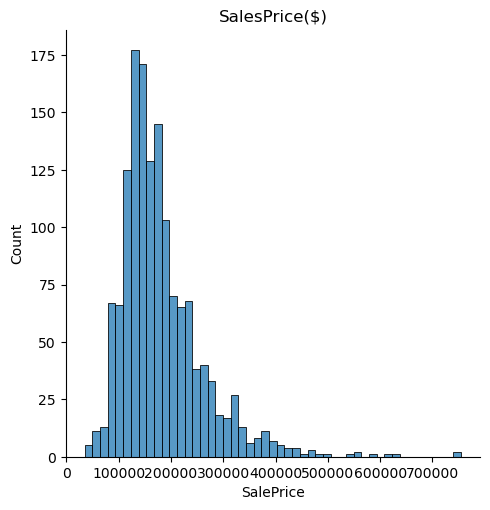

In [5]:
plt.figure()
sns.displot(df_train_data['SalePrice'])
plt.title('SalesPrice($)')


*Not exactly a Normal distribution. A centreing transformation such as box-cox /logorithmic or sqrt should be considered <br>
to boost model pefrormence. <br>
Next, let's explore correlations:

<AxesSubplot:title={'center':'Numeric Features Correlation'}>

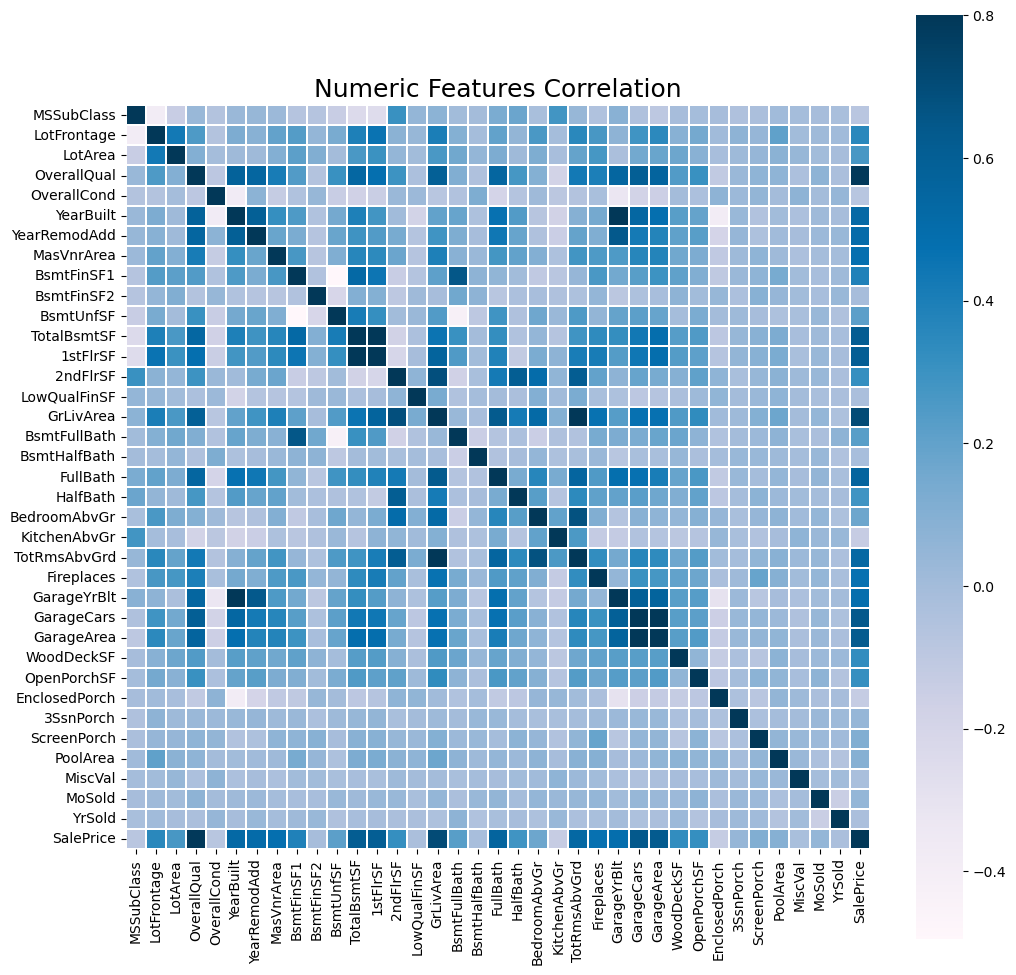

In [6]:
colormap = plt.cm.PuBu
plt.figure(figsize=(12,12))
plt.title('Numeric Features Correlation',y=1,size=18)
sns.heatmap(df_train_data.corr(),square = True, linewidths = 0.1,
            cmap = colormap, linecolor = "white", vmax=0.8)

*First thing first, SalePrice appears to strongly correlate with overallQual, GrLivArea, TotalBsmtSF, 1stFlrSF<br>
,GarageCars and GarageArea (The last two have a strong linear relationship for obvious reasons).<br>
We should stride with care here, as it is not guaranteed that a feature which exhibit strong correlation is also more important.(nonlinear relashionships my be present)<br>*

*The correlation matrix suggests multicolinearity (GrLivArea and TotRmsAbvGrd and more) which can cause the traind model to underperform. <br>
However, this is less of a concern for this project since the chosen estimators are ensemble tree based and <br>
Neural network.*<br>
Lets continue to explore the data*

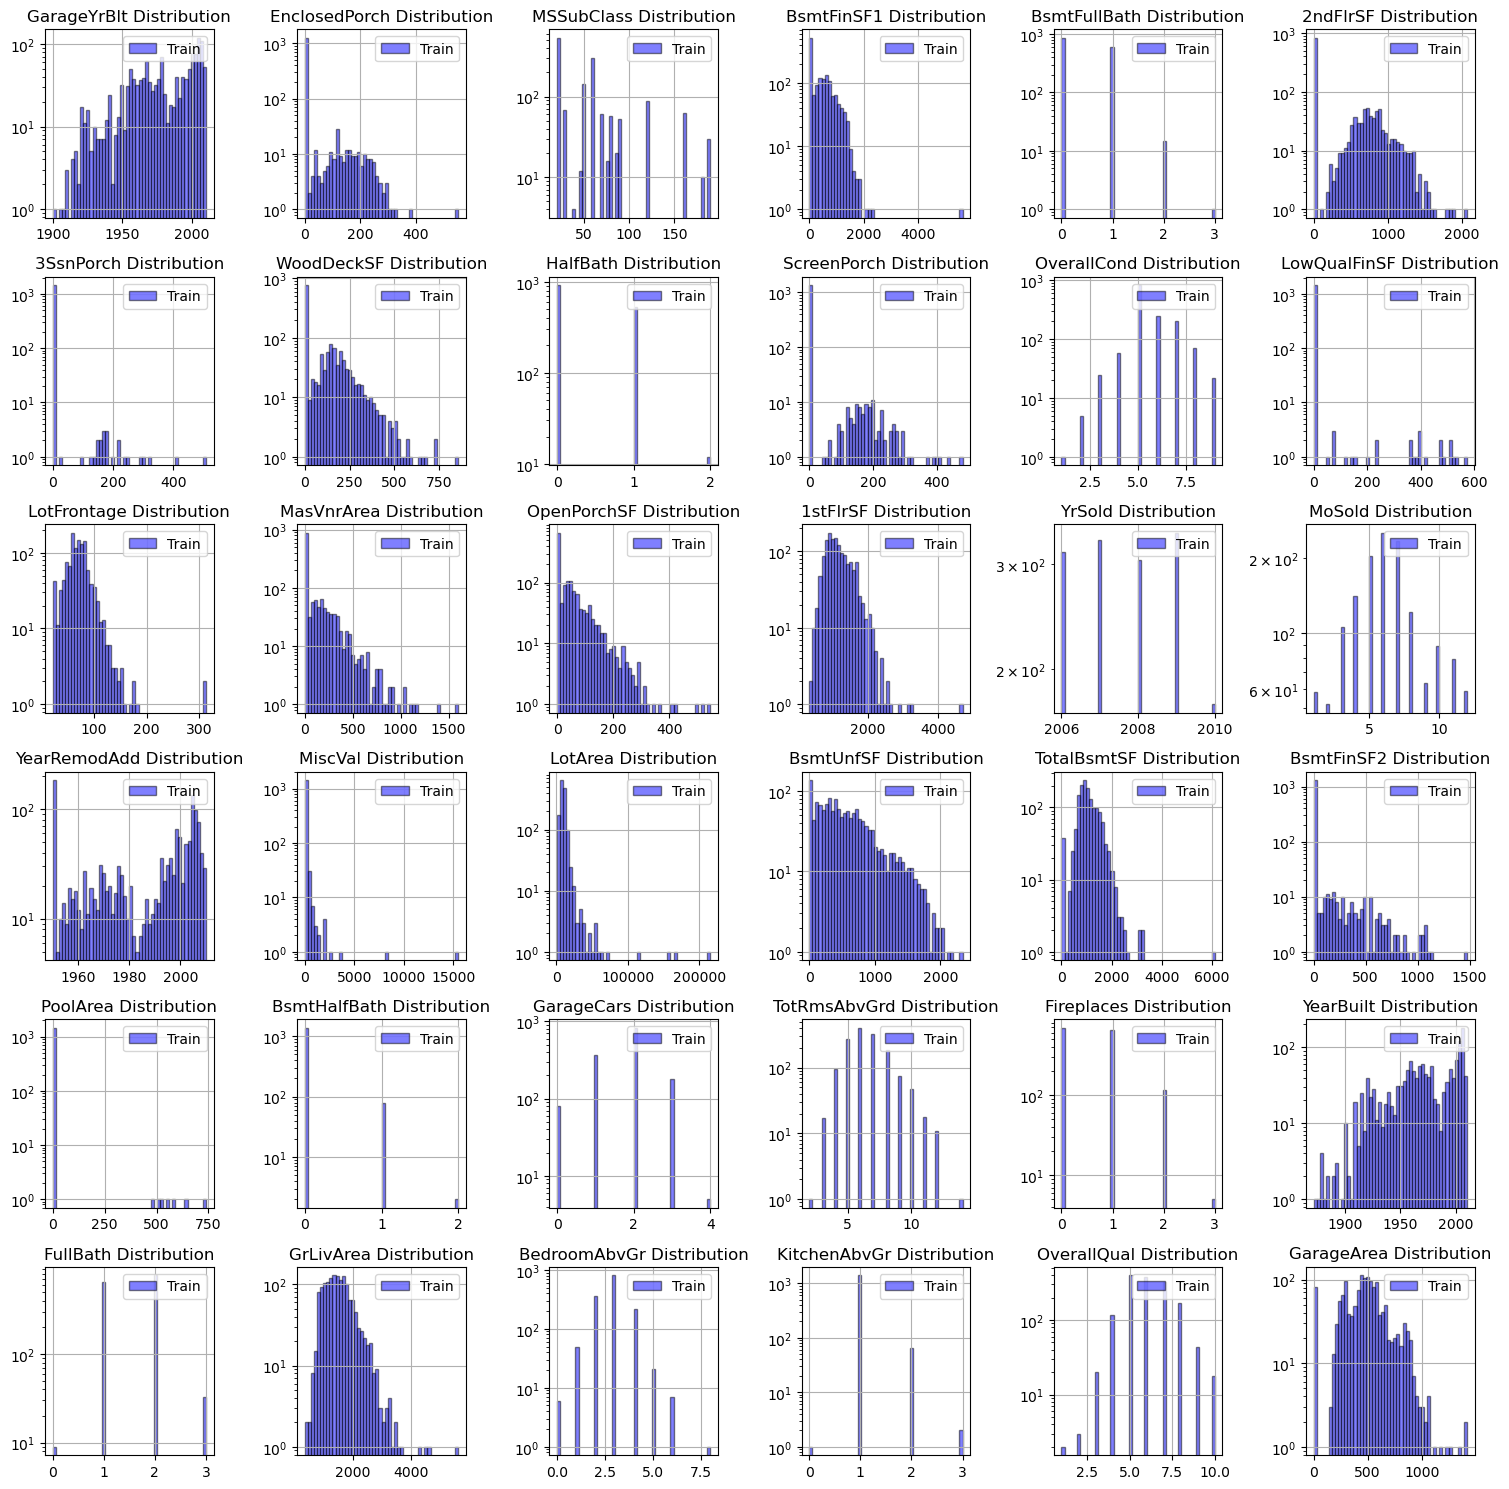

In [7]:
#Let's have a quick look on the Numerical features Histograms
#plot the histograms of the remaining numerical features to identify potential outliers:
#remain_num_feats=list(set(dat_stat_test.columns) - set(dualft_list)) 
remain_num_feats=list(set(dat_stat_test.columns))
def draw_num_histograms(df_tr,cols):
    fig=plt.figure(figsize=(15,15))
    n_rows=round(np.sqrt(len(cols)));n_cols=round(np.sqrt(len(cols)))
    for i,var_name in enumerate(cols):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df_tr[var_name].hist(ax=ax,bins=50,alpha=0.5,color='b', edgecolor='black',label='Train')
        plt.legend(loc='upper right')
        plt.yscale('log')
        ax.set_title(var_name+" Distribution")
    fig.tight_layout() 
    plt.show()

draw_num_histograms(df_train_data,remain_num_feats)

*It appears that the train and test data generally distributes similarly.<br>
some features like 'LotArea' and 'LotFrontage' exhibit suspected outliers
We Apply IQR outlier filtering on these features:*


## Data Prep

*The data preperation includes, filtering outliers, impuation of numerical and categorical features and scaling.
The train and test data are preproccesd separatly to avoid data leakage: A situation where inromation about the Test data is passed to the training data. This may occur during all kinds of preproccessing steps such as imputation, outlier filtering etc. If the sole purpose is to imrove the models performance for the specific test data given here, then a joint train/test preproccessing of the data will probably generate better scores. However generally this practice is considered a bad habit*.  

In [8]:

#First we'll notice that there are numerical features that contain information regarding existance and range. An example is 
#Is the basement size which in the absence of Basement gets the value zero which may play as an outlier. 
#We call these features "dual features". When removing outliers we have to treat these features differently
dualft_list=[]    
for ftr in dat_stat_train:
    if df_train_data[ftr].eq(0).any(axis=0)==True:
      dualft_list.append(ftr)
print(dualft_list)

['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [9]:
#We start with the dual features and perform the IQR on the Nonzero elements of the features
def remove_outlier_IQR(df,dualft_list):
    for i in dualft_list:
            col=df[i][df[i]!=0]
            Q1=col.quantile(0.25)
            Q3=col.quantile(0.75)
            IQR=Q3-Q1
            lower=Q1-1.5*IQR; upper=Q3+1.5*IQR
            if lower<0:
                df_final=df[df[i]<(upper)]
            else:
                drop_idx=df[i][(df[i]>0) & (df[i]<lower)].index
                df_final=df.drop(index=drop_idx)  
            df=df_final[:]
    return df        
df_train_data=remove_outlier_IQR(df_train_data,dualft_list)

#As mentioned before, the susepcted features for outliers are LotArea, LotFrontage. Since they they are strongly correlated, it appears
#that filtering the LotArea outliers also filters LotFrontage 
otlr=['LotArea'] 
def remove_outlier_IQR(df,otlr):
    for i in otlr:
            Q1=df[i].quantile(0.25)
            Q3=df[i].quantile(0.75)
            IQR=Q3-Q1
            df_final=df[(df[i]>(Q1-1.5*IQR)) & (df[i]<(Q3+1.5*IQR))]          
            df=df_final[:]
    return df         
df_train_filt=remove_outlier_IQR(df_train_data,otlr)
df_Test_filt=df_Test_data[:]


In [10]:
#Encoding categorical data. The ordinal features are manually identified and mapped to integers 
ord_feats=["ExterCond","ExterQual","BsmtQual","BsmtCond","BsmtExposure","HeatingQC",\
          "KitchenQual","GarageQual","GarageCond"]
map1={'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
map2={'None':0,'No':1,'Mn':2,'Av':3,'Gd':4}
for i in ord_feats:
    df_train_filt[i].fillna('None',inplace=True)
    df_Test_filt[i].fillna('None',inplace=True)
    if i=='BsmtExposure':
       df_train_filt[i]= df_train_filt[i].map(map2)
       df_Test_filt[i]= df_Test_filt[i].map(map2)
    else:
        df_train_filt[i]= df_train_filt[i].map(map1)
        df_Test_filt[i]= df_Test_filt[i].map(map1)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'LotFrontage'),
  Text(1, 0, 'Alley'),
  Text(2, 0, 'BsmtFinType1'),
  Text(3, 0, 'BsmtFinType2'),
  Text(4, 0, 'Electrical'),
  Text(5, 0, 'FireplaceQu'),
  Text(6, 0, 'GarageType'),
  Text(7, 0, 'GarageYrBlt'),
  Text(8, 0, 'GarageFinish'),
  Text(9, 0, 'PoolQC'),
  Text(10, 0, 'Fence'),
  Text(11, 0, 'MiscFeature')])

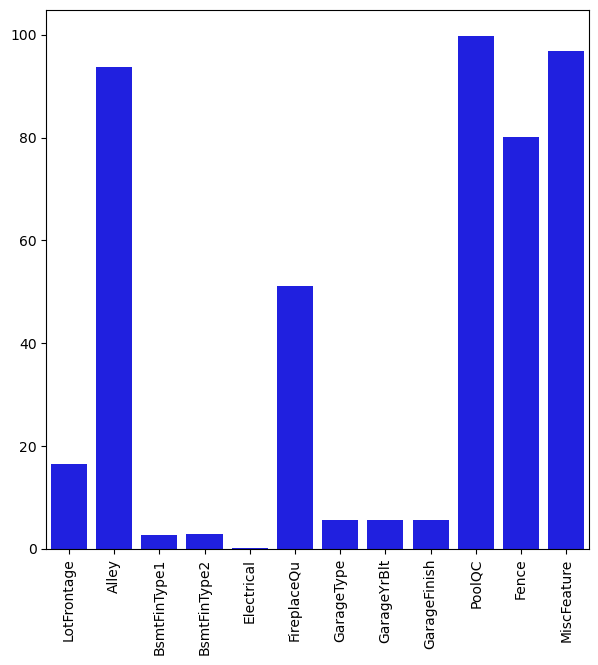

In [11]:
#Now we start the imputation proccess. first let's take a look on the nulls counts in training data: 
nan_precent=100*(df_train_filt.isna().sum())/(len(df_train_filt))
plt.figure(figsize=(7,7))
sns.barplot(x=nan_precent[nan_precent>0].index,y=nan_precent[nan_precent>0],color="b")       
plt.xticks(rotation=90)

In [12]:
#Imputation

Fill_none=['Alley','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','PoolQC','Fence','MiscFeature','MasVnrType']
for i in Fill_none:
    df_train_filt[i].fillna('None',inplace=True)
    df_Test_filt[i].fillna('None',inplace=True)
df_train_filt['GarageYrBlt'].fillna(0,inplace=True) 

tst_fill_zeros=['MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea','GarageYrBlt']
for i in tst_fill_zeros: 
    df_Test_filt[i].fillna(0,inplace=True) 
    
tst_fill_modes=['MSZoning','Utilities','Exterior1st','Exterior2nd','Functional','SaleType','TotalBsmtSF','Electrical']
for i in tst_fill_modes: 
    df_train_filt[i].fillna(df_train_filt[i].mode()[0],inplace=True)  
    df_Test_filt[i].fillna(df_Test_filt[i].mode()[0],inplace=True)  
    


*LotFrontage is highly correlated with LotArea. Hence the missing values of LotFrontage are filled with linear regression to Lotarea.*

In [13]:
indep=df_train_filt['LotArea'][df_train_filt['LotFrontage'].isnull().values==False].to_frame()
dep=df_train_filt['LotFrontage'][df_train_filt['LotFrontage'].isnull().values==False].to_frame()
linreg=LinearRegression(fit_intercept=True)
linreg.fit(indep,dep)
m,b=linreg.coef_,linreg.intercept_;m=np.reshape(m,(1,))
nulls_train = df_train_filt.loc[df_train_data['LotFrontage'].isnull(),'LotArea']
null_fills=pd.Series(m*nulls_train+b)
df_train_filt.loc[df_train_filt['LotFrontage'].isnull(),'LotFrontage']=null_fills.values

nulls_Test = df_Test_filt.loc[df_Test_data['LotFrontage'].isnull(),'LotArea']
null_fills=pd.Series(m*nulls_Test+b)
df_Test_filt.loc[df_Test_filt['LotFrontage'].isnull(),'LotFrontage']=null_fills.values



*Now that the data is filtered, the ordinal features are encoded and missing values are filled, we're left with encoding the remaining categorical features with one-hot encoding. Rare instances are also removed*

In [90]:
cat_cols=df_train_filt.select_dtypes(include=['object']).columns.tolist() 
df_trn=pd.get_dummies(df_train_filt, columns=cat_cols)
df_tst=pd.get_dummies(df_Test_filt, columns=cat_cols)

Train_target=df_trn['SalePrice']
df_trn.drop(['SalePrice'],axis=1,inplace=True)

trn_diff=list(set(df_trn.columns) - set(df_tst.columns))
trn_lngth=[]
for i in trn_diff:
    trn_lngth.append(sum(df_trn[i]))
df_trn.drop(trn_diff,axis=1,inplace=True)

tst_diff=list(set(df_tst.columns) - set(df_trn.columns))
tst_lngth=[]
for i in tst_diff:
    tst_lngth.append(sum(df_tst[i]))
df_tst.drop(tst_diff,axis=1,inplace=True)



In [89]:
#Scaling the test and train features 
df_scaler=preprocessing.StandardScaler()
cols=df_trn.columns
df_norm = df_scaler.fit_transform(df_trn.to_numpy())
df_norm = pd.DataFrame(df_norm,columns=cols)
cols=df_tst.columns
df_tst_norm = df_scaler.fit_transform(df_tst.to_numpy())
df_tst_norm = pd.DataFrame(df_tst_norm, columns=cols)


#A log transfrom is applied on the target variable 
Y_trnsfrm=pd.DataFrame(np.log(Train_target))

#Scale target
target_scaler = preprocessing.StandardScaler()
cols=Y_trnsfrm.columns
target_Norm = target_scaler.fit_transform(Y_trnsfrm.to_numpy())
target_Norm= pd.DataFrame(target_Norm, columns=cols)

#sanity check
print(np.shape(df_norm))
print(np.shape(target_Norm))
print(np.shape(df_tst_norm))



(1238, 243)
(1238, 1)
(1459, 243)


## Modelling 1 

*In the spirit of Occam's razor we start with a linear regression with L2 norm regularizaion (aka Ridge). 
The metric by which the kaggle test data is evaluated is the root-mean-square-log-error. Hence, a costum metric (rmsle) is defined.*

In [18]:
#Scorer functions
def Rmsle_func(y_gt,y_pred):
    y_gt=np.exp(target_scaler.inverse_transform(pd.DataFrame(y_gt)))
    y_pred=np.exp(target_scaler.inverse_transform(pd.DataFrame(y_pred)))
    score=-np.sqrt(MSE(np.log(y_gt), np.log(y_pred)))
    return score

def scorer():
    return make_scorer(Rmsle_func, greater_is_better=False)

#ridge regression with cross validation and hyperparameter tuning
Ridge_reg = linear_model.Ridge()
params = {"alpha":np.logspace(-4,2,7)}
grid = GridSearchCV(Ridge_reg,params,scoring=scorer())
grid.fit(df_norm,target_Norm)
bst_score_Ridge = grid.best_score_
bst_params_Ridge=grid.best_params_
Ridge_best = grid.best_estimator_
print('rmsle_ridge='+str(round(bst_score_Ridge,3)))

rmsle_ridge=0.122


*We can probablty do better as the use of linear regression cannot capture more complex nonlinear relashionships.<br>*
*We'll use four different tree-based regressors:*
(1) xgboost
(2) LightGBM
(3) Gradient Boost 
(4) Random forest

*The hyperparameter tuning was carried separatly on a single fold (due to time constrains). The right way to carry out a hyp-param tuning is a combined grid-search and cross validation followed by a selection of the best set of parameters.*

In [19]:
xgb_model = XGBRegressor(learning_rate=0.003,n_estimators=3500,max_depth=14,min_child_weight=3,subsample=0.6,\
                         colsample_bytree=0.7, seed=42,eval_metric='rmsle')
lgbm = lgb.LGBMRegressor(objective='regression',boosting_type='gbdt',learning_rate=0.03,num_leaves =100,n_estimators=6000,
                         max_depth = 4,min_child_samples = 1,subsample=0.4,subsample_freq=3,colsample_bytree=0.6,                      reg_lambda=0.03,
                         verbose=-1,min_split_gain=0,reg_alpha=0.008,random_state=42)                                                                  
gbr = GradientBoostingRegressor(n_estimators=6000,learning_rate=0.01,max_depth=4,max_features='sqrt',min_samples_leaf=15,\
                                min_samples_split=10,loss='huber',random_state=42)  
RF=RandomForestRegressor(n_estimators=800,random_state=42,max_depth=10)

#cross validation of the "partially tuned" regressors: 
Model_list=[xgb_model,lgbm,gbr,RF]
Models_scores=[]
for item in Model_list: Models_scores.append(cross_val_score(item,df_norm\
        ,target_Norm,cv=5,scoring=scorer()))

In [20]:
#Model metrics
score_mean=[];score_std=[];model_str=[]
for i,j in enumerate(Models_scores): score_mean.append(np.mean(j)),score_std.append(np.std(j)) 

print(score_mean)
    

[0.11255356114214236, 0.1091958647742893, 0.1090912396079478, 0.12970726168164504]


*It appears that lgbm and gbr are the winners. Random forest performes worse than Ridge regression. This is suspicious<br>
since RF is obviously much more expresive. This could be the result of the partial hyperparameter training.*<br>

*Let's try to use stacking to improve the score. The tree-based models will serve as the base learners and the we'll use a linear regression as a meta model to find the best combination of the tree based models*


In [21]:
linear=linear_model.LinearRegression()
stack_reg = StackingRegressor(regressors=Model_list,meta_regressor=linear)
score_vec=[]
N_splits=5
#cross validation
resid_store=[]
kf = KFold(n_splits=N_splits,random_state=1987,shuffle=True) #
for i, [train_idx,val_idx] in enumerate(kf.split(df_norm)):
    resid_df=pd.DataFrame()
    df_base=pd.DataFrame()
    X_t,X_v,Y_t,Y_v=df_norm.iloc[train_idx,:],df_norm.iloc[val_idx,:],target_Norm.iloc[train_idx,:],target_Norm.iloc[val_idx,:]
    stack_reg.fit(X_t,Y_t)
    y_stk=stack_reg.predict(X_v)
    y_stk_orig=np.exp(target_scaler.inverse_transform(pd.DataFrame(y_stk)))
    y_valid_orig=np.exp(target_scaler.inverse_transform(pd.DataFrame(Y_v)))
    score_vec.append(np.sqrt(MSE(np.log(y_valid_orig), np.log(y_stk_orig))))
    #store residuals
    resid_df['residuals']=pd.DataFrame(abs(y_valid_orig-y_stk_orig))
    resid_df['prices']=pd.DataFrame(y_valid_orig)
    resid_df.sort_values(by=['prices'],inplace=True)
    resid_store.append(resid_df)


[]


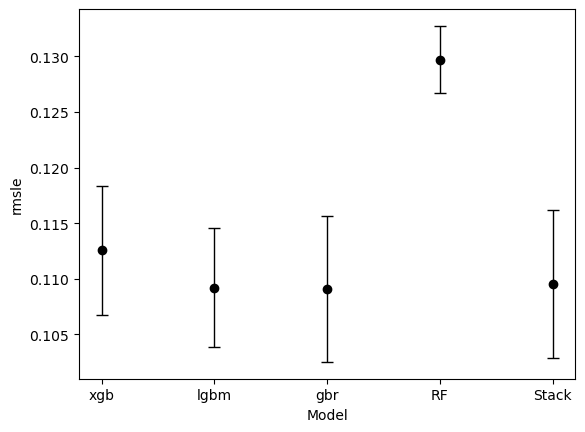

In [110]:
score_mean.append(np.mean(score_vec))
score_std.append(np.std(score_vec))
plt.errorbar(['xgb','lgbm','gbr','RF','Stack'],score_mean,score_std,linestyle='None', marker='o', color = "black",lw = 2,
                capsize = 4, capthick = 1,elinewidth=1)
print(model_str)
plt.xlabel("Model")
plt.ylabel("rmsle")
plt.show()

*It appears that stacking in this case does not improve the validation score. A more expresive nonlinear may result in a<br> better score.*

In [ ]:
#train stack on full data and predict
stack_reg.fit(df_norm,target_Norm)
y_pred=stack_reg.predict(df_tst_norm)
y_pred_orig=np.exp(target_scaler.inverse_transform(pd.DataFrame(y_pred)))


In [26]:
Y_submit=pd.DataFrame()
Y_submit['SalePrice']=pd.DataFrame(y_pred_orig)
Y_submit.index += 1461
Y_submit.to_csv("D:\Kaggle_Housing\submit_stack.csv",index_label='Id')

"*All models are wrong, but some are usefull*"<br>
*The model residuals can tell us a lot. The end user will most likely want to use the model to make informed descisions.* 

Text(0.5, 1.0, 'Probablity for Error>=x')

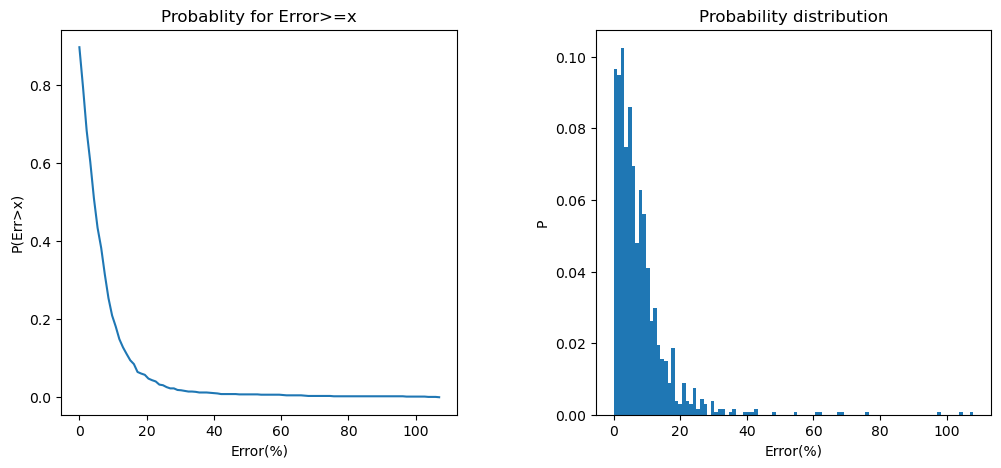

In [34]:
df_resid_valid = pd.concat(resid_store) 
df_resid_valid.sort_values(by=['prices'],inplace=True)
x=df_resid_valid['prices'];y=df_resid_valid['residuals']
relative_err=(y/x)*100  
fig, axes = plt.subplots(1,2,figsize=(12,5))
axes = axes.ravel()
fig.subplots_adjust(wspace=.35)
vals,bins,b_obj=plt.hist(relative_err,bins=100,density=True,axes=axes[1]) 
axes[1].set_xlabel("Error(%)")
axes[1].set_ylabel("P")
axes[1].set_title("Probability distribution")
probs=vals*np.diff(bins)
np.sum(probs)
cumul=np.cumsum(probs)
axes[0].plot(bins[:-1],1-cumul)
axes[0].set_xlabel("Error(%)")
axes[0].set_ylabel("P(Err>x)")
axes[0].set_title("Probablity for Error>=x")

*On the right- the validation sets relative error (i.e. the absolute residuals collected from all the validation folds)*<br>
*On the left- the probablity of getting it wrong in more (or equal) than X%.It appears that for example, the probability <br>
 of making a prediction that is wrong by 20% or higher is around 0.06*. <br>
<br>
*Grouping the residuals by price can help us determine in what ranges the model is most accurate and it its accuracy is sufficient for our purpose. Let's make the assumption that the maximal acceptable error of some investor is 20% (very unreasonable). The plot beneath depicts the probablity of having a 20% or higher error grouped by price bins of 50K (Also defined as the probablity for Err>=20% given that the price is contained in some [x1,x2]*

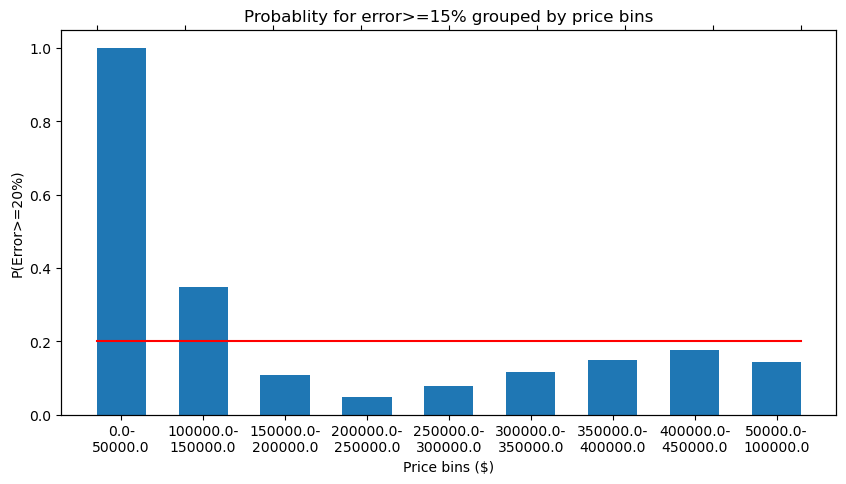

In [111]:
df_e=pd.DataFrame()
df_e['relerr']=relative_err;df_e['prices']=x


grps=pd.cut(df_e["prices"],np.arange(0, 5e5, 5e4))
df_e['grps']=grps
bins=df_e.groupby('grps')['relerr'].apply(list)
eps=15
prob_=[]
for i in range(len(bins)):
    arr=np.array(bins.iloc[i])
    prob_.append(len(arr[arr>=eps])/len(arr))
#plt.bar(range(len(prob_)),prob_)    
 
names=[]
for i in range(len(df_e['prices'])):
    e_l=df_e.iloc[i,2].left
    e_r=df_e.iloc[i,2].right
    names.append("{}-\n{}".format(e_l,e_r))
names=np.unique(names)

fig, ax1 = plt.subplots(figsize = (10, 5))
ax1.bar(names,prob_,width = 0.6)    
ax1.set_xlabel("Price bins ($)")
ax1.set_ylabel("P(Error>=20%)")
ax1.set_title("Probablity for error>=20% grouped by price bins")

#ax2 = plt.twinx(ax = ax1)
ax2 = plt.twiny(ax = ax1)
ax2.set_xticklabels([])
ax2.plot(names,0.2*np.ones(len(names),),color='red')


*The Investor will probably choose to buy houses within the acceptable error range (<20%) which is >150K*<br>
*A more comprehensive analysis should take into account the sign of the residuals to let the buyer/seller know wether the model under or over appreciates the prices and in what price bin* <br>

*The stacking model performance is propably insufficient for deployment. Improving accuracy can be done by:<br>
(1)"Garbage in-Garbage out"- Additional feature engineering 
(2)Performing a full cross-validation & hyper-parameter tuning
(3)Adding more base learners 
(4)Replacing the Meta model with a nonlinear model

## Modelling 2 

*Generally speaking, when dealing with tabular data ANN are known to be inferior to tree based methods.<br>
*However, since neural nets sound sophisticated and cool we should definatly give it a go*<br>
*We perform a cross validation to the Net. It appears that for the specific parameters, the ANN score is lower than most of the tree based method and the stacking (A hyperparameter tuning is requierd)*

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_121 (Dense)           (None, 170)               41480     
                                                                 
 dropout_99 (Dropout)        (None, 170)               0         
                                                                 
 dense_122 (Dense)           (None, 119)               20349     
                                                                 
 dropout_100 (Dropout)       (None, 119)               0         
                                                                 
 dense_123 (Dense)           (None, 83)                9960      
                                                                 
 dropout_101 (Dropout)       (None, 83)                0         
                                                                 
 dense_124 (Dense)           (None, 58)              

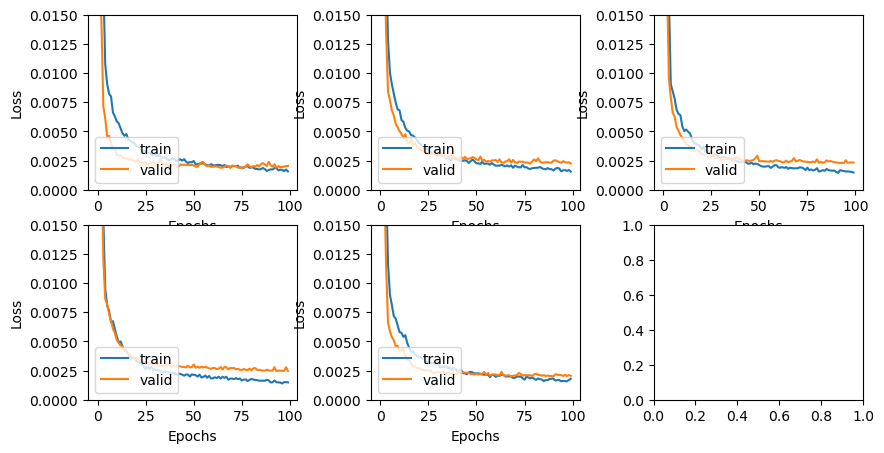

In [107]:
def Net_architecture(Inp_dim,drop_fac,n_l,dropout_fac):
    Layer_Vec=[]
    Layer_Vec.append(keras.Input(shape=(Inp_dim[1],)))
    #Generate a vector with number of nodes in each layer
    Li=Inp_dim[1]
    for i in range(n_l):
        Nodes_num=round(drop_fac*Li)
        Li=round(drop_fac*Li)
        Layer_Vec.append(layers.Dense(Nodes_num, activation="sigmoid"))
        Layer_Vec.append(layers.Dropout(dropout_fac))
    Layer_Vec.append(layers.Dense(1, activation="sigmoid"))
    return Layer_Vec  

def Deep_func(X_train,X_valid,Y_train,Y_valid,drop_fac,n_l,Lr,Epochs,Batch_size,dropout_fac):
    Inp_dim=np.shape(X_train)
    Net_arc=Net_architecture(Inp_dim,drop_fac,n_l,dropout_fac)
    NN_model = keras.Sequential(Net_arc) 
    NN_model.summary()
    opt=Adam(learning_rate=Lr, beta_1=0.9,beta_2=0.999,epsilon=1e-08)
    #NN_model.compile(loss='mean_squared_error',optimizer=opt)  
    NN_model.compile(loss='mean_squared_error',optimizer=opt)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=100, min_lr=1e-6)
    History=NN_model.fit(X_train,Y_train,epochs =Epochs, batch_size = Batch_size,callbacks=[reduce_lr],shuffle = True,\
                         validation_data= (X_valid,Y_valid))
    return History,NN_model


df_scaler_nn=preprocessing.MinMaxScaler()
cols=df_trn.columns
df_norm_nn = df_scaler_nn.fit_transform(df_trn.to_numpy())
df_norm_nn = pd.DataFrame(df_norm_nn,columns=cols)
#Scale target
Y_trnsfrm=pd.DataFrame(np.log(Train_target))
target_scaler = preprocessing.MinMaxScaler()
cols=Y_trnsfrm.columns
target_Norm_nn = target_scaler.fit_transform(Y_trnsfrm.to_numpy())
target_Norm_nn = pd.DataFrame(target_Norm_nn, columns=cols)
RMSLE_nn=[]
N_splits=5
fig, axes2 = plt.subplots(2,3,figsize=(10,5))
axes2 = axes2.ravel()
fig.subplots_adjust(wspace=.35)
kf = KFold(n_splits=N_splits,random_state=30,shuffle=True) #
for i, [train_idx,val_idx] in enumerate(kf.split(df_trn)):
    X_t,X_v,Y_t,Y_v=df_norm_nn.iloc[train_idx,:],df_norm_nn.iloc[val_idx,:],target_Norm_nn.iloc[train_idx,:],target_Norm_nn.iloc[val_idx,:]
    Epochs=100;Batch_size=42;Lr=0.001;drop_fac=0.7;n_l=5;dropout_fac=0.1
    History,NN_model=Deep_func(X_t,X_v,Y_t,Y_v,drop_fac,n_l,Lr,Epochs,Batch_size,dropout_fac)
    train_loss=History.history['loss']
    val_loss=History.history['val_loss']
    Y_valid_NN=NN_model.predict(X_v)  
    Y_valid_orig_NN=np.exp(target_scaler.inverse_transform(pd.DataFrame(Y_valid_NN)))
    Y_valid_gd=np.exp(target_scaler.inverse_transform(pd.DataFrame(Y_v)))
    RMSLE_nn.append(np.sqrt(MSE(np.log(Y_valid_orig_NN), np.log(Y_valid_gd))))    
    
    axes2[i].plot(train_loss,label='train')
    axes2[i].plot(val_loss,label='valid')
    axes2[i].set_ylim([0, 0.015])
    axes2[i].legend(loc='lower left')
    axes2[i].set_xlabel("Epochs")
    axes2[i].set_ylabel("Loss")
    #axes2[i].set_title("Probablity for Error>=x")

In [108]:
print(np.mean(RMSLE_nn))

0.11966927723707266
